<a href="https://colab.research.google.com/github/axshay007/Language_detection_project/blob/main/Language_detection_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

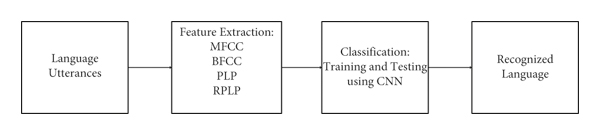

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

In [ ]:
df = pd.read_csv('/content/language_detection.csv')

In [ ]:
df.head(5)

,Text,language
0,klement gottwaldi surnukeha palsameeriti ning ...,Estonian
1,sebes joseph pereira thomas på eng the jesuit...,Swedish
2,ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...,Thai
3,விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...,Tamil
4,de spons behoort tot het geslacht haliclona en...,Dutch


In [ ]:
df["language"].value_counts()

Estonian      1000
Swedish       1000
English       1000
Russian       1000
Romanian      1000
Persian       1000
Pushto        1000
Spanish       1000
Hindi         1000
Korean        1000
Chinese       1000
French        1000
Portugese     1000
Indonesian    1000
Urdu          1000
Latin         1000
Turkish       1000
Japanese      1000
Dutch         1000
Tamil         1000
Thai          1000
Arabic        1000
Name: language, dtype: int64

In [ ]:
df["Text"].value_counts()

haec commentatio automatice praeparata res astronomicas colligit excerptas e pagina [] sitús small-body database quem elaboraverunt nasa et jpl apud institutum technologiae californiense                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    48
இக்கோயில் முதன்மைத் திருக்கோயில் என்ற வகைப்பாட்டில் இந்

In [ ]:
from sklearn.linear_model import RidgeClassifier

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.Text, 
                                                    df.language,
                                                    test_size=0.325000000000000001,
                                                    random_state=2551,
                                                    shuffle=True)

In [ ]:
X_CountVectorizer = CountVectorizer(stop_words='english')
X_train_counts = X_CountVectorizer.fit_transform(X_train)

In [ ]:
X_TfidfTransformer = TfidfTransformer()
X_train_tfidf = X_TfidfTransformer.fit_transform(X_train_counts)

In [ ]:
model = RidgeClassifier()

model.fit(X_train_tfidf, y_train)

RidgeClassifier()

In [ ]:
result = model.score(X_CountVectorizer.transform(X_test),y_test)

In [ ]:
result*100

96.51748251748252

In [ ]:
text = """Türkiye Cumhuriyeti güçlüdür ve 
ilelebet baki kalacaktır."""

text = [text]

text_counts = X_CountVectorizer.transform(text)


prediction = model.predict(text_counts)

f"Prediction is {prediction[0]}"

'Prediction is Turkish'

In [ ]:
text = """I quite like him. 
I'm so in love with him and my heart flutters when I see him."""

text = [text]

text_counts = X_CountVectorizer.transform(text)

#Prediction Processing
prediction = model.predict(text_counts)

f"Prediction is {prediction[0]}"

'Prediction is English'

**From converting model to pickle file**


In [ ]:

import pickle

In [ ]:
pickle.dump(y_test,open('lang.pkl','wb'))